Stats701 Homework 8  
Written by: David Li

In [1]:
# Modules and Packages Pre-loading
import urllib.request as ur # for url opening
import re as regex # better name for solving questions
import matplotlib.pyplot as plt # for plotting the histogram later
import random as ran
import sqlite3
%matplotlib inline

Part 1: Regular Expression Warmup  
(Spent about 60 minutes)

Question 1: Using urllib to read the file. How many words?

In [2]:
byteslist = [] # contains the raw bytes initially read
asciilist = [] # ascii form of the words read
opened = ur.urlopen("http://www.greenteapress.com/thinkpython/code/words.txt")
for line in opened: # iterate through each line / word
    trimmed = line[:-2] # removes the annoying \r\n at the end of words from the decoding
    byteslist.append(trimmed) 

for counter in byteslist: # new list that has the ascii decoding
    decoded = counter.decode('ascii')
    asciilist.append(decoded)

# This should be a list, according to the problem
print(type(asciilist))

# Should only contain ascii characters
print(asciilist[:5])
print(asciilist[-5:])

# How many words are in the list?
# All lines read were words, so don't have to exclude any cases. 113809 words
print(len(asciilist))



<class 'list'>
['aa', 'aah', 'aahed', 'aahing', 'aahs']
['zymoses', 'zymosis', 'zymotic', 'zymurgies', 'zymurgy']
113809


Question 2: Check out the data 

Comments: Looks something similar to a dictionary, has a bunch of words in alphabetical order. Lots of plural forms of words are present with the singular version (ex. starlight is in the words, as well as starlights). There are no numbers or uppercase letters present in the words.

Question 3: How many words start with 4 consecutive consonants?

In [3]:
q3regex1 = regex.compile(r'^[^aeiouy]{4}[aeiouy]+') # Desired regex searching, 4 consonants plus stuff after
q3regex2 = regex.compile(r'^[^aeiouy]{4}$') # Desired regex searching, 4 consonants only
q3list1 = list(filter(q3regex1.match, asciilist))
q3list2 = list(filter(q3regex2.match, asciilist))
q3finallist = q3list1 + q3list2
print(q3finallist)
print(len(q3finallist))
# 60 words that start with EXACTLY 4 consecutive consonants

['chthonic', 'phthalic', 'phthalin', 'phthalins', 'phthises', 'phthisic', 'phthisics', 'phthisis', 'pschent', 'pschents', 'schlep', 'schlepp', 'schlepped', 'schlepping', 'schlepps', 'schleps', 'schlock', 'schlocks', 'schmaltz', 'schmaltzes', 'schmalz', 'schmalzes', 'schmalzier', 'schmalziest', 'schmalzy', 'schmeer', 'schmeered', 'schmeering', 'schmeers', 'schmelze', 'schmelzes', 'schmo', 'schmoe', 'schmoes', 'schmoos', 'schmoose', 'schmoosed', 'schmooses', 'schmoosing', 'schmooze', 'schmoozed', 'schmoozes', 'schmoozing', 'schmuck', 'schmucks', 'schnapps', 'schnaps', 'schnecke', 'schnecken', 'schnook', 'schnooks', 'schrik', 'schriks', 'schtick', 'schticks', 'schwa', 'schwas', 'cwms', 'psst', 'tsks']
60


Question 4: How many words contain 4 instances of a?

In [4]:
q4regex = regex.compile(r'(a.*){4,}')
q4list = list(filter(q4regex.search, asciilist))
print(q4list)
print(len(q4list))
# 50 words that contain at least 4 'a's

['abracadabra', 'amadavat', 'amadavats', 'amalgamate', 'amalgamated', 'amalgamates', 'amalgamating', 'amalgamation', 'amalgamations', 'ambassadorial', 'anabaena', 'anabaenas', 'analemmata', 'anasarca', 'anasarcas', 'anathemata', 'antiauthoritarian', 'antitotalitarian', 'arapaima', 'arapaimas', 'atalaya', 'atalayas', 'ataraxia', 'ataraxias', 'baccalaureate', 'baccalaureates', 'caracara', 'caracaras', 'caragana', 'caraganas', 'catamaran', 'catamarans', 'extravaganza', 'extravaganzas', 'kamaaina', 'kamaainas', 'katakana', 'katakanas', 'lackadaisical', 'lackadaisically', 'lavalava', 'lavalavas', 'maharaja', 'maharajas', 'paraphernalia', 'parliamentarian', 'parliamentarians', 'postbaccalaureate', 'sarsaparilla', 'sarsaparillas']
50


Question 5: How many words begin and end with a vowel with consonants in between?

In [5]:
q5regex = regex.compile(r'^[aeiou][^aeiouy]+[aeiou]$')
q5list = list(filter(q5regex.search, asciilist))
print(q5list)
print(len(q5list))
# 165 words that start and end with a vowel and have consonants in between

['aba', 'abbe', 'able', 'abmho', 'abo', 'abri', 'ace', 'ache', 'acme', 'acne', 'acre', 'acta', 'addle', 'ado', 'adze', 'aga', 'age', 'agha', 'agma', 'ago', 'aha', 'ala', 'alba', 'ale', 'alfa', 'alga', 'alma', 'alme', 'alpha', 'also', 'altho', 'alto', 'ama', 'amble', 'ambo', 'ami', 'ammo', 'ample', 'amu', 'ana', 'ane', 'anga', 'angle', 'ani', 'ankle', 'anna', 'ansa', 'anta', 'ante', 'anti', 'antra', 'antre', 'ape', 'aphtha', 'apple', 'apse', 'arco', 'are', 'argle', 'arse', 'arvo', 'asci', 'asthma', 'ate', 'atma', 'ava', 'ave', 'avo', 'awa', 'awe', 'axe', 'axle', 'azo', 'eche', 'echo', 'ecru', 'ecu', 'eddo', 'edge', 'ego', 'eke', 'elhi', 'else', 'eme', 'emu', 'epha', 'era', 'ere', 'ergo', 'erne', 'eta', 'etna', 'eve', 'ewe', 'expo', 'extra', 'ice', 'idle', 'iglu', 'ilka', 'impi', 'indri', 'info', 'infra', 'ingle', 'inkle', 'into', 'intro', 'ire', 'isba', 'isle', 'isthmi', 'istle', 'ixtle', 'obe', 'obi', 'oca', 'ochre', 'ode', 'ogle', 'ogre', 'oho', 'oka', 'oke', 'okra', 'ole', 'olla', 'o

Question 6: How many words start and end with the same two-letter sequence?

In [6]:
# Account for words 2 letters long, automatically considered begin and end with same couplet sequence
q6regex1 = regex.compile(r'^[a-z]{2}$')
q6list1 = list(filter(q6regex1.search, asciilist))
#print(q6list1) # Debugging

#Account for words 3 letters long, check that all letters are the same (the only way to begin and end with same couplet sequence)
q6regex2 = regex.compile(r'^([a-z]{2})\1\1$')
q6list2 = list(filter(q6regex2.search, asciilist))
#print(q6list2) # Debugging, note that there are 0 instances 

# Account for words 4 letters or longer, check that first two letters are same as last two letters
q6regex3 = regex.compile(r'^([a-z]{2}).*\1$')
q6list3 = list(filter(q6regex3.search, asciilist))
#print(q6list3) # Debugging

# Get the final list 
q6finallist = q6list1 + q6list2 + q6list3
print(q6finallist)
print(len(q6finallist))
# A total of 366 words that begin and end with the same 2-letter couplet sequence

['aa', 'ad', 'ae', 'ah', 'ai', 'am', 'an', 'ar', 'as', 'at', 'aw', 'ay', 'ba', 'be', 'bi', 'bo', 'by', 'da', 'de', 'do', 'ef', 'eh', 'el', 'em', 'en', 'er', 'es', 'et', 'ex', 'fa', 'go', 'ha', 'he', 'hi', 'ho', 'id', 'if', 'in', 'is', 'it', 'jo', 'ka', 'la', 'li', 'lo', 'ma', 'me', 'mi', 'mu', 'my', 'na', 'no', 'nu', 'od', 'oe', 'of', 'oh', 'om', 'on', 'op', 'or', 'os', 'ow', 'ox', 'oy', 'pa', 'pe', 'pi', 're', 'sh', 'si', 'so', 'ta', 'ti', 'to', 'un', 'up', 'us', 'ut', 'we', 'wo', 'xi', 'xu', 'ya', 'ye', 'albinal', 'alchemical', 'algal', 'allegorical', 'allheal', 'allodial', 'alluvial', 'alodial', 'alogical', 'alphabetical', 'amalgam', 'anchorman', 'antiauthoritarian', 'antihuman', 'antiquarian', 'antirepublican', 'antitotalitarian', 'antiurban', 'antiwoman', 'anuran', 'areolar', 'arrear', 'asphyxias', 'asramas', 'astasias', 'asterias', 'asthenias', 'asthmas', 'baba', 'caeca', 'carioca', 'centerpiece', 'chinch', 'church', 'coco', 'dada', 'decade', 'decide', 'decode', 'defilade', 'degr

Part 2: Exploring Internet Traffic with Regex  
Time Spent: About 2 hours

Question 1: Download the file from URL above. How many packets are in this file?

In [7]:
# I downloaded the file beforehand and named it SkypeIRC.txt. I'll attach the file with my submission for convenience
counter = 0
with open('/home/david/Desktop/School/Stats701/Homework8/SkypeIRC.txt', 'r') as openfile:
    datastring=openfile.read().replace('\n', '')
    
with open('/home/david/Desktop/School/Stats701/Homework8/SkypeIRC.txt', 'r') as openfile:
    for _ in openfile:
        counter = counter + 1

# This should be "string"
print(type(datastring))
        
print(counter) # 2263 lines / packets
print(datastring[:1000])

<class 'str'>
2263
    1   0.000000  192.168.1.2 → 212.204.214.114 IRC 96 Request (ISON)    2   0.125852 212.204.214.114 → 192.168.1.2  TCP 66 6667 → 2848 [ACK] Seq=1 Ack=31 Win=57890 Len=0 TSval=2196036564 TSecr=14215752    3   0.137361 212.204.214.114 → 192.168.1.2  IRC 112 Response (303)    4   0.137413  192.168.1.2 → 212.204.214.114 TCP 66 2848 → 6667 [ACK] Seq=31 Ack=47 Win=8011 Len=0 TSval=14215889 TSecr=2196036565    5   0.235960  192.168.1.2 → 192.168.1.1  DNS 84 Standard query 0x311f PTR 2.1.168.192.in-addr.arpa    6   0.236116  192.168.1.2 → 192.168.1.1  DNS 88 Standard query 0x3120 PTR 114.214.204.212.in-addr.arpa    7   0.270252  192.168.1.1 → 192.168.1.2  DNS 84 Standard query response 0x311f PTR 2.1.168.192.in-addr.arpa    8   0.294105  192.168.1.1 → 192.168.1.2  DNS 123 Standard query response 0x3120 PTR 114.214.204.212.in-addr.arpa PTR sterling.freenode.net    9   0.985963  192.168.1.2 → 192.168.1.1  DNS 81 Standard query 0x3121 A sterling.freenode.net   10   0.988328  

Question 2: Use Regex to extract all IP addresses. How many unique IP addresses?

In [8]:
ipregex = r'\b\d+\.\d+\.\d+\.\d+\b'
uniqiplist = list(set(regex.findall(ipregex, datastring)))
print(len(uniqiplist)) # 368 unique IP addresses
print(type(uniqiplist)) # This should be a list
print(uniqiplist) # Debugging


368
<class 'list'>
['190.44.165.86', '244.163.253.82', '69.164.189.12', '67.71.69.121', '242.160.200.172', '38.79.128.86', '67.190.177.7', '67.84.148.173', '68.95.198.126', '211.178.73.80', '55.93.53.68', '86.20.229.242', '62.30.220.30', '213.165.187.162', '222.178.142.86', '187.241.235.82', '78.133.40.72', '17.33.38.190', '2.71.2.208', '192.168.1.2', '74.134.3.114', '148.127.184.81', '212.149.248.49', '202.139.177.147', '187.164.38.68', '212.204.214.114', '139.94.160.70', '69.174.241.72', '177.60.201.72', '113.179.243.24', '72.40.37.213', '86.128.194.14', '72.201.60.177', '86.128.187.110', '173.148.84.67', '196.40.10.146', '216.90.165.67', '158.185.46.194', '69.248.108.13', '104.59.163.67', '70.181.220.80', '250.2.34.70', '68.70.72.32', '31.82.121.84', '129.74.53.24', '70.36.75.98', '26.213.175.69', '24.247.87.5', '199.61.181.72', '82.216.129.118', '67.175.21.149', '213.112.53.77', '10.56.99.137', '72.181.61.199', '58.20.234.68', '86.128.191.16', '135.92.160.70', '72.197.60.203', '70.

Question 3: Construct a list of all comcast server names, how many unique?

In [9]:
comcastregex = r'.*?\.comcast\.net'
comcastlist = regex.findall(comcastregex, datastring)
uniqserverlist = []
for element in comcastlist:
    servername = element.split()[-1] # This handles extraneous information, just grab the server name
    uniqserverlist.append(servername)
uniqserverlist = set(uniqserverlist) # 25 unique comcast servers
#print(uniqserverlist) # for debugging

# To see the 25 unique comcast servers without .comcast.net suffix, use the list below
trimmedserverlist = []
for element2 in uniqserverlist:
    trimmedname = element2[:-12] # removes ".comcast.net"
    trimmedserverlist.append(trimmedname)

print(trimmedserverlist) # for debugging

print(type(trimmedserverlist)) # This should be a list

print(len(trimmedserverlist)) # 25 unique comcast servers

['c-68-32-70-119.hsd1.ga', 'c-67-190-177-7.hsd1.co', 'c-67-175-21-149.hsd1.in', 'c-24-22-73-206.hsd1.or', 'c-68-51-91-234.hsd1.in', 'c-71-228-44-157.hsd1.il', 'c-68-84-140-103.hsd1.md', 'c-67-165-90-216.hsd1.oh', 'c-67-188-114-72.hsd1.ca', 'c-24-61-5-13.hsd1.ma', 'c-67-190-60-125.hsd1.co', 'c-67-163-96-170.hsd1.tx', 'c-69-248-108-13.hsd1.pa', 'c-68-53-93-55.hsd1.ky', 'c-68-47-20-134.hsd1.ga', 'c-71-196-236-185.hsd1.co', 'c-67-162-133-209.hsd1.co', 'c-68-38-164-187.hsd1.nj', 'c-24-22-73-206.hsd1.mn', 'c-69-141-46-5.hsd1.nj', 'c-67-163-59-104.hsd1.il', 'c-68-55-27-139.hsd1.md', 'c-69-250-183-56.hsd1.md', 'c-69-244-172-248.hsd1.mi', 'c-24-125-186-144.hsd1.va']
<class 'list'>
25


Question 4: Create plot of how many packets appeared in each second of the recording.

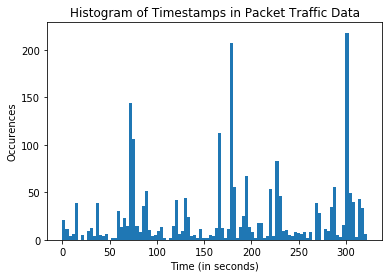

2263
[0, 0, 0, 0, 0]
[319, 320, 322, 322, 322]


In [10]:
timeregex = r'\d{1,3}\.\d{6}'
# convert the string form into numbers for plotting, by the whole second
timelist = [int(float(i)) for i in (regex.findall(timeregex, datastring))] #numerical form for plotting

# Plotting
plt.hist(timelist,bins=100)
plt.xlabel("Time (in seconds)")
plt.ylabel("Occurences")
plt.title("Histogram of Timestamps in Packet Traffic Data")
plt.show()

# Debugging
print(len(timelist)) # This should be 2263
print(timelist[:5]) # Should be pulling the timestamps correctly
print(timelist[-5:]) # Should be pulling the timestamps correctly

Part 3: Retrieving data from the web  
Time spent: About 3.5 hours

Question 1: Open a wikipedia URL and read HTML. Find climate table, find node, what is structure of this node of the tree?

In [11]:
from bs4 import BeautifulSoup

# Open a connection and read contents
openedlink = ur.urlopen("https://en.wikipedia.org/wiki/Ann_Arbor,_Michigan")
data = openedlink.read()

# Use BS to parse the page in html
parsedsoup = BeautifulSoup(data, 'html.parser')

# Search the parsed contents for a climate table
climatesearch = parsedsoup.find("th",string=regex.compile(r'(Climate data).*'))
climatetable = climatesearch.parent.parent

# Return the tags of children of the table, and there are 12 children
childrentags = []
for child in climatetable.children:
    if child.name != None:
        childrentags.append(child.name)
print(childrentags)
print(len(childrentags))

# Return the unique tags of descendents of the table, and there are 252 descendants including the 12 children

descendanttags = []
for des in climatetable.descendants:
    if des.name != None:
        descendanttags.append(des.name)

print(set(descendanttags)) # Just the unique ones, not printing all 252 individual tags
print(len(descendanttags))

# Debugging
# print(climatetable)

['tr', 'tr', 'tr', 'tr', 'tr', 'tr', 'tr', 'tr', 'tr', 'tr', 'tr', 'tr']
12
{'th', 'td', 'tr', 'br', 'a', 'sup', 'span'}
252


Question 2: retrieve_climate_table function

In [12]:
def retrieve_climate_table(url):

    # Check the url is wikipedia-based, as problem asks for a input to be a wikipedia link
    if len(regex.findall('wikipedia', url)) == 0:
        raise RuntimeError('This function only works on wikipedia urls!')
    
    # Establish connection, Throw error if not possible, 
    # apparently error code 200 is a successful connection from research
    if ur.urlopen(url).getcode() != 200:
        raise RuntimeError('The website provided as argument could not be opened..')
    else:
        openedlink = ur.urlopen(url)
        
    # Read in data, and parse with html
    data = openedlink.read()
    parsedsoup = BeautifulSoup(data, 'html.parser')
    
    # Search for climate tables
    climatesearch = parsedsoup.find(string=regex.compile(r'(Climate data).*'))
    climatetable = climatesearch.find_parents("table")
    
    # Arbitrarily pick a table, or return None if no results of a climate table
    if (len(climatetable) == 0):
        return None
    else:
        return ran.choice(climatetable)

# Testing
losexam = 'https://en.wikipedia.org/wiki/Los_Angeles'
hydexam = 'https://en.wikipedia.org/wiki/Hyderabad'
bosexam = 'https://en.wikipedia.org/wiki/Boston'
print(type(retrieve_climate_table(losexam))) # Should be a bs4 object
retrieve_climate_table(losexam)



<class 'bs4.element.Tag'>


<table class="wikitable collapsible" style="width:90%; text-align:center; font-size:90%; line-height: 1.2em; margin:auto;">
<tr>
<th colspan="14">Climate data for Los Angeles (<a href="/wiki/University_of_Southern_California" title="University of Southern California">USC</a>, <a href="/wiki/Downtown_Los_Angeles" title="Downtown Los Angeles">Downtown</a>), 1981–2010 normals, extremes 1877–present</th>
</tr>
<tr>
<th scope="row">Month</th>
<th scope="col">Jan</th>
<th scope="col">Feb</th>
<th scope="col">Mar</th>
<th scope="col">Apr</th>
<th scope="col">May</th>
<th scope="col">Jun</th>
<th scope="col">Jul</th>
<th scope="col">Aug</th>
<th scope="col">Sep</th>
<th scope="col">Oct</th>
<th scope="col">Nov</th>
<th scope="col">Dec</th>
<th scope="col" style="border-left-width:medium">Year</th>
</tr>
<tr style="text-align: center;">
<th scope="row" style="height: 16px;">Record high °F (°C)</th>
<td style="background: #FF2C00; color:#000000;">95<br/>
(35)</td>
<td style="background: #FF2C00;

In [13]:
retrieve_climate_table(hydexam)

<table class="wikitable" style="width:90%; text-align:center; font-size:90%; line-height: 1.2em; margin:auto;">
<caption>Climate data for Hyderabad</caption>
<tr>
<th scope="row">Month</th>
<th scope="col">Jan</th>
<th scope="col">Feb</th>
<th scope="col">Mar</th>
<th scope="col">Apr</th>
<th scope="col">May</th>
<th scope="col">Jun</th>
<th scope="col">Jul</th>
<th scope="col">Aug</th>
<th scope="col">Sep</th>
<th scope="col">Oct</th>
<th scope="col">Nov</th>
<th scope="col">Dec</th>
<th scope="col" style="border-left-width:medium">Year</th>
</tr>
<tr style="text-align: center;">
<th scope="row" style="height: 16px;">Record high °C (°F)</th>
<td style="background: #FF2600; color:#000000;">35.9<br/>
(96.6)</td>
<td style="background: #FF1000; color:#FFFFFF;">39.1<br/>
(102.4)</td>
<td style="background: #F50000; color:#FFFFFF;">42.2<br/>
(108)</td>
<td style="background: #E60000; color:#FFFFFF;">43.3<br/>
(109.9)</td>
<td style="background: #D50000; color:#FFFFFF;">44.5<br/>
(112.1)</t

In [14]:
retrieve_climate_table(bosexam)

<table class="wikitable collapsible" style="width:90%; text-align:center; font-size:90%; line-height: 1.2em; margin:auto;">
<tr>
<th colspan="14">Climate data for Boston (Logan Airport), 1981−2010 normals,<sup class="reference" id="cite_ref-111"><a href="#cite_note-111">[e]</a></sup> extremes 1872−present<sup class="reference" id="cite_ref-113"><a href="#cite_note-113">[f]</a></sup></th>
</tr>
<tr>
<th scope="row">Month</th>
<th scope="col">Jan</th>
<th scope="col">Feb</th>
<th scope="col">Mar</th>
<th scope="col">Apr</th>
<th scope="col">May</th>
<th scope="col">Jun</th>
<th scope="col">Jul</th>
<th scope="col">Aug</th>
<th scope="col">Sep</th>
<th scope="col">Oct</th>
<th scope="col">Nov</th>
<th scope="col">Dec</th>
<th scope="col" style="border-left-width:medium">Year</th>
</tr>
<tr style="text-align: center;">
<th scope="row" style="height: 16px;">Record high °F (°C)</th>
<td style="background: #FF860D; color:#000000;">72<br/>
(22)</td>
<td style="background: #FF7F00; color:#00000

Question 3: list_climate_table_row_names function

In [15]:
def list_climate_table_row_names(url):
    climatetable = retrieve_climate_table(url)
    
    # Case where no table was retrieved
    if climatetable is None:
        return None
    
    # Filling in a list with the extracted row names
    rownamelist = []
    rownames = climatetable.find_all('th', scope = 'row')
    for x in rownames:
        rownamelist.append(x.get_text())
    return rownamelist
    
list_climate_table_row_names(losexam)



['Month',
 'Record high °F (°C)',
 'Mean maximum °F (°C)',
 'Average high °F (°C)',
 'Daily mean °F (°C)',
 'Average low °F (°C)',
 'Mean minimum °F (°C)',
 'Record low °F (°C)',
 'Average rainfall inches (mm)',
 'Average rainy days (≥ 0.01 in)',
 'Mean monthly sunshine hours',
 'Percent possible sunshine']

In [16]:
# Testing, the type of the returned object should be a list for Q3
print(type(list_climate_table_row_names(losexam)))

<class 'list'>


Question 4: Describe how to accomplish retrieving data from a row of climate table with previous 2 functions

For description ease, I will reference 3.2 when I talk about retrieve_climate_table and 3.3 when I talk about list_climate_table_row_names.

1. I would execute 3.2 to obtain a climate table of interest; this would utilize the given URL argument from Q4 specs. If there is no table, throw an error that a table was not found.

2. Then I would execute 3.3; this would utilize the given rowname argument from the Q4 specs. Check that the rowname argument actually exists in 3.3. If not, throw an error that rowname wasn't found.

3. Narrow down the table result obtained from executing 3.2 to only show data for the rowname specified in the rowname argument.

4. Create a list that will store the data taken from the rowname, initialized as empty

5. Iterate through the multiple values in the row, and store each value into the list by appending. To access the values in the row, we can utilize the tree-like structure and use get_text()

6. Return the list

Part 4: Relational Databases and SQL  
Time Spent: About 1 hour

Question 1: Load Chinook_Sqlite.sqlite, how many tables?

In [17]:
# Establish connection and a cursor to do SQL commands
connection = sqlite3.connect('/home/david/Desktop/School/Stats701/Homework8/Chinook_Sqlite.sqlite')
c = connection.cursor()

# How many tables? Counting the tables and placing into a list
tables = list(c.execute("SELECT count(*) FROM sqlite_master WHERE type = 'table'"))[0][0]
tables # 11 tables


11

Question 2: What are names of the tables in database?

In [18]:
for table in (c.execute("SELECT * FROM sqlite_master WHERE type = 'table'")):
    print (table[1])

Album
Artist
Customer
Employee
Genre
Invoice
InvoiceLine
MediaType
Playlist
PlaylistTrack
Track


Question 3: list_album_ids_by_letter function

In [19]:
def list_album_ids_by_letter(char):
    # Make function work for either case type
    lowerform = char.lower()+'%'
    capitalform = char.upper()+'%'
    
    # Listing album ids
    albumlist = list(c.execute("SELECT * FROM Album WHERE Title Like ? or Title Like ?", (lowerform, capitalform)))
    albumkeysonly = [key[0] for key in albumlist]
    return albumkeysonly

print(len(list_album_ids_by_letter("C"))) # 23 albums that start with the letter C
print(len(list_album_ids_by_letter("M"))) # 25 albums that start with the letter M

# Testing

print(list_album_ids_by_letter("C") == list_album_ids_by_letter("c")) # This should be true, case is regardless
type(list_album_ids_by_letter("C")) # Should be a list



    

23
25
True


list

Question 4: list_song_ids_by_album_letter function

In [20]:
def list_song_ids_by_album_letter(char):
    # Make function work for either case type
    lowerform = char.lower()+'%'
    capitalform = char.upper()+'%'
    
    # Listing Song IDS
    songlist = list(c.execute("SELECT Track.TrackId FROM Track "
              "INNER JOIN Album ON Album.AlbumId = Track.AlbumId "
              "WHERE Album.Title LIKE ? OR Album.Title LIKE ?", (lowerform, capitalform)))
    songkeysonly = [key[0] for key in songlist]
    return songkeysonly

print(len(list_song_ids_by_album_letter("N"))) # 74 songs that start with the letter N
print(len(list_song_ids_by_album_letter("D"))) # 106 songs that start with the letter D

# Testing

print(list_song_ids_by_album_letter("N") == list_song_ids_by_album_letter("n")) # This should be true, case is regardless
type(list_song_ids_by_album_letter("N")) # Should be a list

74
106
True


list

Question 5: total_cost_by_album_letter function

In [21]:
def total_cost_by_album_letter(char):
    # Make function work for either case type
    lowerform = char.lower()+'%'
    capitalform = char.upper()+'%'
    
    totalcostlist = list(c.execute("SELECT SUM(Track.UnitPrice) FROM Track "
                                  "INNER JOIN Album ON Album.AlbumId = Track.AlbumId "
                                  "WHERE Album.Title LIKE ? OR Album.Title LIKE ?", (lowerform, capitalform)))
    totalcostonly = [key[0] for key in totalcostlist][0]
    return totalcostonly

print(total_cost_by_album_letter("L")) # Total cost of $350.39

# Testing
print(total_cost_by_album_letter("L") == total_cost_by_album_letter("l")) # Should be True

350.3900000000009
True


In [22]:
# Close the connection for Good Measure
c.close()